<a href="https://colab.research.google.com/github/garimal161/Git_learing_code/blob/master/Predict_Fuel_Efficiency_For_Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Data Using Pandas**

## Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

## Check tensorflow Version and set environment parameters

In [2]:
tf.__version__

'2.8.2'

In [3]:
np.set_printoptions(precision=3, suppress=True)

## Load Data Using Pandas

In [4]:
col_name = ['MPG', 'Cyl', 'CC', 'HP', 'Wt', 'Acc', 'Model', 'Origin']

In [5]:
from google.colab import files
uploaded = files.upload()

Saving auto-fuel.data to auto-fuel.data


In [6]:
load_data = pd.read_csv('auto-fuel.data', sep=' ', names=col_name, skipinitialspace=True, na_values='?', comment='\t')

## Copy and View Data

In [7]:
fueldata = load_data.copy()
fueldata

,MPG,Cyl,CC,HP,Wt,Acc,Model,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


# **Data Cleaning**

## Check unknown values

In [8]:
fueldata.isna().sum()

MPG       0
Cyl       0
CC        0
HP        6
Wt        0
Acc       0
Model     0
Origin    0
dtype: int64

## Drop the unknown values

In [9]:
fueldata = fueldata.dropna()

# **One-Hot Encode**

In [10]:
fueldata['Origin'] = fueldata['Origin'].map({1:'USA', 2:'EUR', 3:'JPN'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
fueldata = pd.get_dummies(fueldata, columns=['Origin'], prefix='', prefix_sep='')

In [12]:
fueldata

,MPG,Cyl,CC,HP,Wt,Acc,Model,EUR,JPN,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1


# **Split the Data**

## Train Test Split

In [13]:
train_data = fueldata.sample(frac=0.8, random_state=0)

In [14]:
test_data = fueldata.drop(train_data.index)

## Split features and labels

In [15]:
trnfeature = train_data.copy()
tstfeature = test_data.copy()
trnlbl = trnfeature.pop('MPG')
tstlbl = tstfeature.pop('MPG')

# **Exploratory Data Analysis (EDA)**

## View the Data

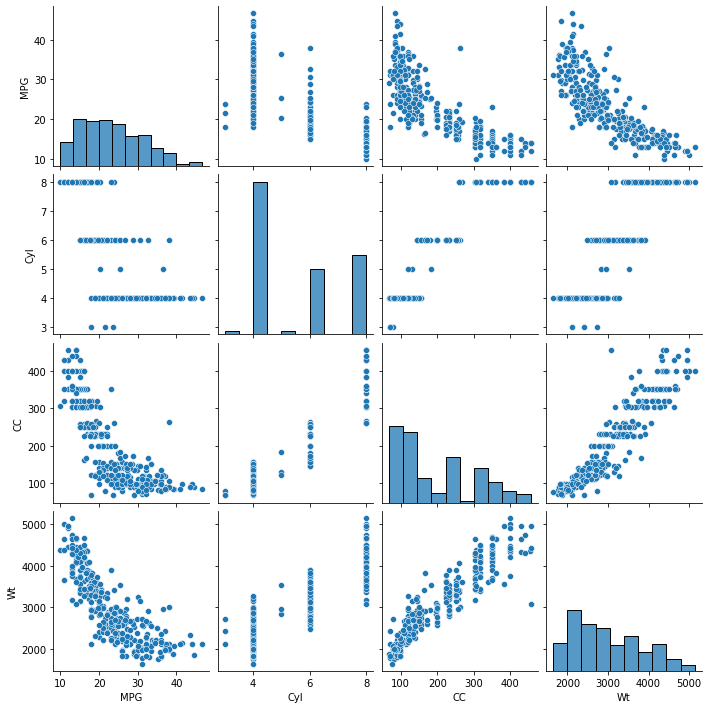

In [16]:
sns.pairplot(train_data[['MPG', 'Cyl', 'CC', 'Wt']])

## Statistical Analysis of Data

In [17]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cyl,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
CC,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
HP,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Wt,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acc,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
EUR,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
JPN,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


# **Normalization**

## Check the difference in mean and standard deviation of each feature

In [18]:
train_data.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.310510,7.728652
Cyl,5.477707,1.699788
CC,195.318471,104.331589
HP,104.869427,38.096214
Wt,2990.251592,843.898596
Acc,15.559236,2.789230
Model,75.898089,3.675642
EUR,0.178344,0.383413
JPN,0.197452,0.398712
USA,0.624204,0.485101


## Normalization Layer

Build pre-processing into your model using preprocessing.Normalization layer

In [19]:
normdata = preprocessing.Normalization(axis=-1)

Now adapt() it

In [20]:
normdata.adapt(np.array(trnfeature))

In [21]:
normdata.mean.numpy()

array([[   5.478,  195.318,  104.869, 2990.252,   15.559,   75.898,
           0.178,    0.197,    0.624]], dtype=float32)

View the normalised data

In [22]:
row1 = np.array(trnfeature[:1])
with np.printoptions(precision=2, suppress=True):
  print('First Row: ',row1)
  print()
  print('Normalised: ', normdata(row1).numpy())

First Row:  [[   4.    90.    75.  2125.    14.5   74.     0.     0.     1. ]]

Normalised:  [[-0.87 -1.01 -0.79 -1.03 -0.38 -0.52 -0.47 -0.5   0.78]]


# **Linear Regression**

# **One Input Variable**

First, we will use only one input variable ‘Horsepower’ (HP) to predict MPG

To train the model with tf.keras, first, we need to define the model architecture

In this case, we will use keras.Sequential model. Using this model, we can define the sequence of steps

We can use two steps

1. Normalize the input HP

2. By using layers.Dense, apply a linear transformation =+ to product 1 output

## Create Normalization Layer

In [23]:
hp = np.array(trnfeature['HP'])

In [24]:
hp_normdata = preprocessing.Normalization(input_shape=[1,], axis=None)

In [25]:
hp_normdata.adapt(np.array(trnfeature['HP']))

## Build Sequential Model

In [26]:
hpmodel = tf.keras.Sequential([hp_normdata, layers.Dense(units=1)])

In [27]:
hpmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


## Configure Training Procedures

In [28]:
hpmodel.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

## Execute the training

In [29]:
history = hpmodel.fit(trnfeature['HP'], trnlbl, epochs=100, verbose=0, validation_split=0.2)

## Analyse History Object

View the statisctics stored in history object

In [30]:
hist = pd.DataFrame(history.history)

In [31]:
hist['epoch'] = history.epoch

In [32]:
hist.head()

,loss,val_loss,epoch
0,22.865332,22.937340,0
1,22.064484,22.137474,1
2,21.262575,21.337246,2
3,20.460484,20.537315,3
4,19.660629,19.737354,4


In [33]:
hist.tail()

,loss,val_loss,epoch
95,3.803607,4.192340,95
96,3.803430,4.186650,96
97,3.808717,4.202447,97
98,3.804701,4.190270,98
99,3.803197,4.181373,99


In [34]:
def pltloss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 25])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
  plt.show()

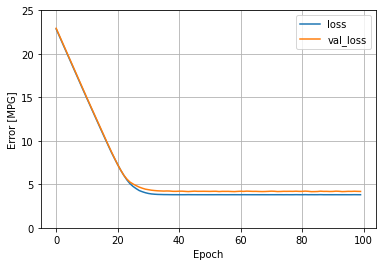

In [35]:
pltloss(history)

## Store the results

In [36]:
tstres = {}

In [37]:
tstres['HP_model'] = hpmodel.evaluate(tstfeature['HP'], tstlbl, verbose=0)

## Predictions

In [38]:
x = tf.linspace(0.0, 250, 251)

In [39]:
y = hpmodel.predict(x)

In [40]:
def plt_hp(x, y):
  plt.scatter(trnfeature['HP'], trnlbl, label='Data')
  plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel('Horsepower')
  plt.ylabel('MPG')
  plt.legend()
  plt.show()

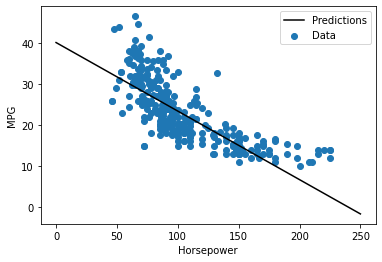

In [41]:
plt_hp(x,y)

# **Multiple Input Variabes**

## Build Model

Use the Normalization layer adapted to whole dataset

In [42]:
lm_model = tf.keras.Sequential([normdata, layers.Dense(units=1)])

## Configure Training Procedure

In [43]:
lm_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

## Execute the Training

In [44]:
history = lm_model.fit(trnfeature, trnlbl, epochs=100, verbose=0, validation_split=0.2)

## Training and Validation Error

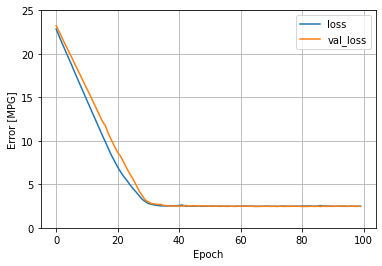

In [45]:
pltloss(history)

## Collect Results - Test Set

In [46]:
tstres['lm_model'] = lm_model.evaluate(tstfeature, tstlbl, verbose=0)

## Analyze History Object

In [47]:
hist1 = pd.DataFrame(history.history)

In [48]:
hist1['epoch'] = history.epoch

In [49]:
hist1.head()

,loss,val_loss,epoch
0,22.850283,23.238518,0
1,21.999737,22.526251,1
2,21.162626,21.776918,2
3,20.354103,21.036955,3
4,19.540678,20.331402,4


In [50]:
hist1.tail()

,loss,val_loss,epoch
95,2.470684,2.471497,95
96,2.483804,2.500848,96
97,2.478844,2.458531,97
98,2.468008,2.491442,98
99,2.477117,2.471762,99


In [52]:
def pltloss(history): 


  plt.plot(history.history['loss'], label='loss') 
  plt.plot(history.history['val_loss'], label='val_loss') 
  plt.ylim([0, 10]) 
  plt.xlabel('Epoch') 
  plt.ylabel('Error [MPG]') 
  plt.legend() 
  plt.grid(True)
  plt.show()

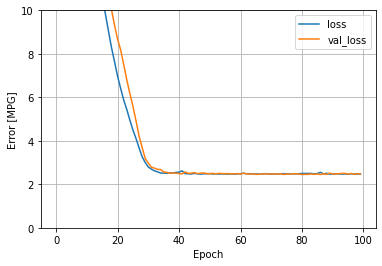

In [53]:
pltloss(history)

In [54]:
tstres = {}
tstres['HP_model'] = hpmodel.evaluate(tstfeature['HP'],tstlbl, verbose=0)

In [55]:
x = tf.linspace(0.0, 250, 251)

In [56]:
y = hpmodel.predict(x)

In [57]:
def plt_hp(x, y):
  plt.scatter(trnfeature['HP'], trnlbl, label='Data') 
  plt.plot(x, y, color='k', label='Predictions') 
  plt.xlabel('Horsepower') 
  plt.ylabel('MPG') 
  plt.legend() 
  plt.show()


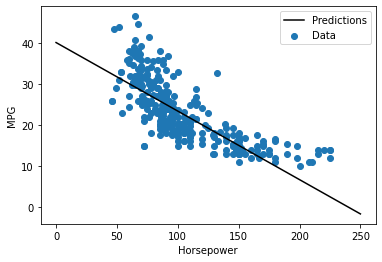

In [58]:
plt_hp(x,y)

In [59]:
lm_model = tf.keras.Sequential([normdata,layers.Dense(units=1)])

In [62]:
lm_model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.1), loss='mean_absolute_error')

In [63]:
history = lm_model.fit(trnfeature, trnlbl, epochs=100, verbose=0, validation_split = 0.2)

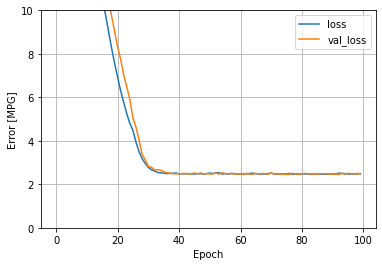

In [64]:
pltloss(history)

In [65]:
tstres['lm_model'] = lm_model.evaluate(tstfeature, tstlbl, verbose=0)

In [67]:
def nn_model(norm): 

  model = keras.Sequential([ 
    norm, 
layers.Dense(64, activation='relu'), 
layers.Dense(64, activation='relu'), 
layers.Dense(1) 
]) 
  model.compile(loss='mean_absolute_error', 
  optimizer=tf.keras.optimizers.Adam(0.001)) 
  return model

In [68]:
nn_hpmodel = nn_model(hp_normdata)
nn_hpmodel.summary()  

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 64)                128       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [69]:
history = nn_hpmodel.fit( trnfeature['HP'], trnlbl, verbose=0, validation_split=0.2, epochs=100)

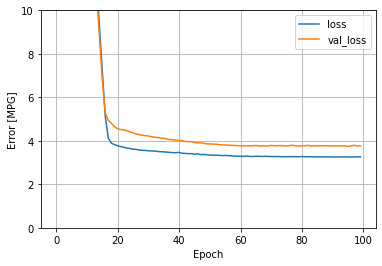

In [70]:
pltloss(history) 

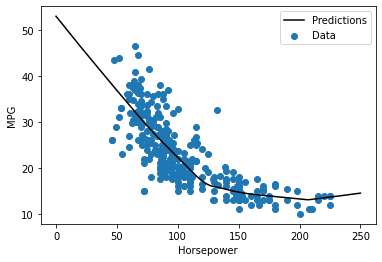

In [71]:
x = tf.linspace(0.0, 250, 251)

y = nn_hpmodel.predict(x)

plt_hp(x, y)

In [72]:
tstres['nn_hpmodel'] = nn_hpmodel.evaluate(tstfeature['HP'], tstlbl, verbose=0)

In [73]:
nn_model = nn_model(normdata)  
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_6 (Dense)             (None, 64)                640       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [75]:
history = nn_model.fit(trnfeature, trnlbl, verbose=0, validation_split=0.2, epochs=100)


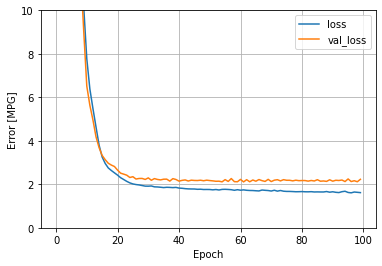

In [76]:
pltloss(history)

In [77]:
tstres['dnn_model'] = nn_model.evaluate(tstfeature, tstlbl, verbose=0)

In [78]:
pd.DataFrame(tstres, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
HP_model,3.639619
lm_model,2.543419
nn_hpmodel,2.868027
dnn_model,1.682374


In [79]:
tstpred = nn_model.predict(tstfeature).flatten()

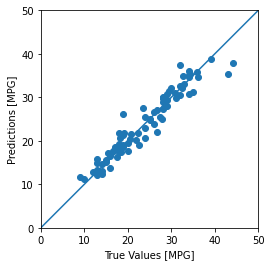

In [81]:
a = plt.axes(aspect='equal')
plt.scatter(tstlbl, tstpred) 
plt.xlabel('True Values [MPG]') 
plt.ylabel('Predictions [MPG]') 
lims = [0, 50] 
plt.xlim(lims) 
plt.ylim(lims) 
_ = plt.plot(lims, lims) 
plt.show()

In [82]:
error = tstpred - tstlbl


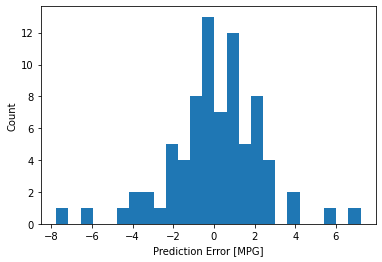

In [83]:
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]') 
_ = plt.ylabel('Count') 
plt.show()